# QF600 Asset Pricing
## Efficient Frontier Revisited
### Chia Jun Xian Edmund

Part 1: Minimum-Tracking-Error Frontier

Let the market return be the target return. 

 1. Estimate the expected deviation from market return, for the ten industry portfolios

 2. Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

 3. Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

    - This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

    - This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

    - Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

 4. Calculate the information ratio and portfolio weights for the "tangency" portfolio.

Part 2: Minimum-Variance Frontier w/o Short Sales

 5. Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

 6. Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 105 data points.

 7. Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.
Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

 8. Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

In [2]:
Industry_Portfolio = \
    pd \
        .read_excel('Industry_Portfolios.xlsx')

Market_Portfolio = \
    pd \
        .read_excel('Market_Portfolio.xlsx')

In [3]:
combined = \
    Industry_Portfolio \
        .merge(
            Market_Portfolio,
            how = 'left',
            left_on = 'Date',
            right_on = 'Date'
            )

In [4]:
#get industry list
industry_list = \
    Industry_Portfolio \
        .columns \
            .to_list()

industry_list.remove('Date')

### 1. Estimate the expected deviation from market return, for the ten industry portfolios

In [5]:
for industry in industry_list:
    
    combined[industry] = \
        combined[industry] - combined['Market'] # industry return - market return

In [6]:
mean_ret = \
    pd \
        .DataFrame(combined.mean(axis= 0)) \
            .rename(columns = {0 : 'Expected_Deviation'}) \
                .iloc[1 : ,]

answer_1 = mean_ret.iloc[ :  len(mean_ret) - 1 , ]

answer_1

,Expected_Deviation
NoDur,0.154750
Durbl,-0.014750
Manuf,0.264750
Enrgy,0.483083
HiTec,0.018167
Telcm,0.133333
Shops,0.168250
Hlth,0.035750
Utils,0.159083
Other,-0.259000


### 2. Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

In [7]:
combined \
        .drop(
            columns = ['Date', 'Market'],
            inplace = True
            )

V = \
    combined \
        .cov() \
            .to_numpy()

combined \
    .cov()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [8]:
inv_V = \
    np \
        .linalg \
            .inv(V)

R = \
    answer_1[['Expected_Deviation']] \
        .to_numpy()

R_prime = \
    R \
        .transpose()

R_prime_inv_V = \
    np \
        .matmul(
            R_prime, 
            inv_V
            )
alpha = \
    np \
        .matmul(
            R_prime_inv_V, 
            np \
                .ones(
                    shape = \
                        (R_prime_inv_V.shape[1], 1)
                         )
                )

#Delta Calculation

e_prime_inv_V = \
    np \
        .matmul(
            np \
                .ones(
                    shape = (inv_V.shape[0], 1)
                    ) \
                        .transpose(), 
                        inv_V
                        )
delta = \
    np \
        .matmul(
            e_prime_inv_V, 
            np \
                .ones(
                    shape = (e_prime_inv_V.shape[1], 1)
                    )
                    )

#Zeta Calculation

zeta = \
    np \
        .matmul(
            np \
                .matmul(
                    R_prime,
                    inv_V
                ),
                R
        )

print('alpha: ', alpha[0][0]); print('delta: ', delta[0][0]); print('zeta:', zeta[0][0])

alpha:  2.9321278826306236
delta:  58.55025437639894
zeta: 0.2047449735113007


In [9]:
#std of return for frontier portfolio

def var(returns):
    variance = \
        1 / delta + \
        (delta / (zeta * delta - alpha**2)) * \
        (returns - alpha / delta)**2
    
    return np.sqrt(variance)[0][0]

### 3. Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

- This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

- This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).

- Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

In [10]:
#Generate returns from 0-2%

min_variance_frontier =  \
    pd \
        .DataFrame(
            np \
                .arange(0, 0.101, 0.005)) \
                    .rename(columns = {0 : 'Rp'}
                            )

#compute sd of retruns
min_variance_frontier['sd'] = \
    min_variance_frontier \
        .apply(
            lambda x : var(x['Rp']), 
            axis=1
            )

Answwer 3


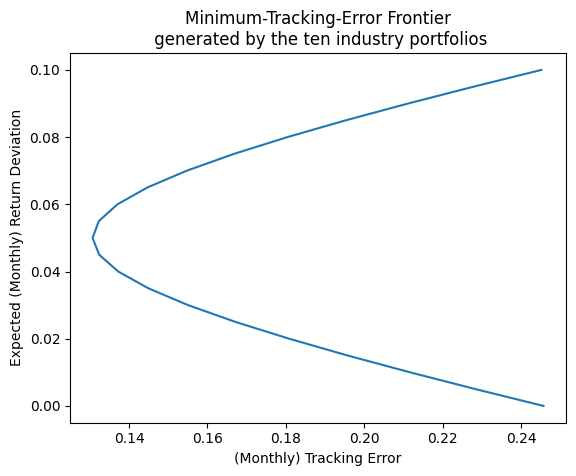

In [11]:
plt \
    .plot(min_variance_frontier['sd'], 
         min_variance_frontier['Rp'])

plt \
    .xlabel('(Monthly) Tracking Error')

plt \
    .ylabel('Expected (Monthly) Return Deviation')

plt \
    .title('Minimum-Tracking-Error Frontier\n generated by the ten industry portfolios')

print('Answwer 3')
plt.show()

In [12]:
#std for frontier portfolio WITH RISKLESS ASSET
def var_with_riskless(returns, rf):
    
    var_riskless = \
        ((returns - rf) ** 2) / (zeta - 2 * alpha * rf + delta * rf**2)
    
    return np.sqrt(var_riskless)[0][0]


In [13]:
riskfree = 0

efficient_frontier_riskless = \
    pd \
        .DataFrame(
            np \
                .arange(0, 0.101, 0.005)) \
                    .rename(
                        columns = {0 : 'Rp'}
                            )


efficient_frontier_riskless['sd'] = \
    efficient_frontier_riskless \
        .apply(
            lambda x : var_with_riskless(x['Rp'], riskfree), 
            axis = 1
            )

#filter for top halve of frontier with riskless asset 
efficient_frontier_riskless['sd'] = \
    np \
        .where(efficient_frontier_riskless['Rp'] <= riskfree,
               0, efficient_frontier_riskless['sd'])

#filter for top halve of min-variance frontier where returns > Rmv

efficient_min_variance_frontier = \
    min_variance_frontier[min_variance_frontier['Rp'] >= (alpha / delta)[0][0]]

Answer 4


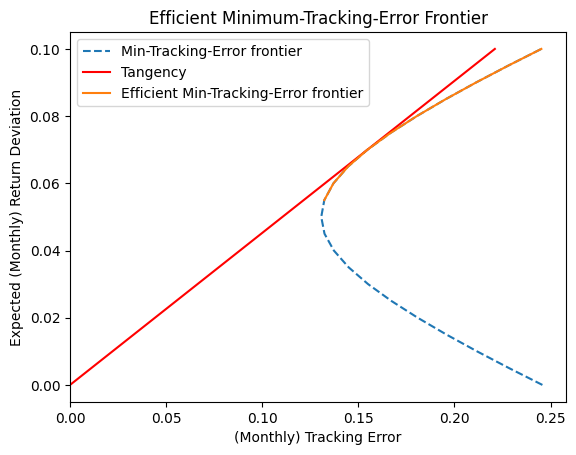

In [14]:
plt \
    .plot(min_variance_frontier['sd'], 
         min_variance_frontier['Rp'],
         linestyle = 'dashed',
         label = 'Min-Tracking-Error frontier')

plt \
    .plot(efficient_frontier_riskless['sd'],
         efficient_frontier_riskless['Rp'],
         color = 'red',
         label = 'Tangency')

plt \
    .plot(efficient_min_variance_frontier['sd'], 
         efficient_min_variance_frontier['Rp'],
         label = 'Efficient Min-Tracking-Error frontier')
         
plt \
    .legend()

plt \
    .xlim(xmin = 0)

plt \
    .xlabel('(Monthly) Tracking Error')

plt \
    .ylabel('Expected (Monthly) Return Deviation')

plt \
    .title('Efficient Minimum-Tracking-Error Frontier')

print('Answer 4')
plt.show()

### 4. Calculate the information ratio and portfolio weights for the "tangency" portfolio.

In [15]:
mean_ret_tangency_portfolio = \
    (alpha * riskfree - zeta) / (delta * riskfree - alpha)

risk_premium_tangency_portfolio = \
    mean_ret_tangency_portfolio - riskfree

variance_tangency_portfolio = \
    (zeta - 2 * alpha * riskfree + delta * riskfree ** 2) / (delta ** 2 * (riskfree - alpha / delta) ** 2)

Information = \
    (zeta - 2 * alpha * riskfree + delta * riskfree**2) ** 0.5

a = \
    (
        zeta * np \
        .matmul(
            inv_V, 
            np.ones(shape = (inv_V.shape[0], 1))
            ) - alpha * np \
                .matmul(
                    inv_V, 
                    R
                    )
                ) / (zeta * delta - alpha ** 2)

b = \
    (
        delta * np \
        .matmul(
            inv_V, 
            R
            ) - alpha * np \
                .matmul(
                    inv_V, 
                    np.ones(shape = (inv_V.shape[0], 1))
                        )
                    ) / (zeta * delta - alpha ** 2)

weights = a + b * mean_ret_tangency_portfolio

print('Answer 4')
print('\nInformation ratio of the tangency portfolio = ', round(Information[0][0], 3))

print('\nPortfolio Weights: \n')

pd \
    .concat(
        [
            answer_1.reset_index(), 
            pd.DataFrame(weights)
        ],
            axis = 1) \
                .rename(columns = 
                        {0 : 'weights', 
                         'index' : 'Portfolios'}
        )

Answer 4

Information ratio of the tangency portfolio =  0.452

Portfolio Weights: 



,Portfolios,Expected_Deviation,weights
0,NoDur,0.154750,0.052634
1,Durbl,-0.014750,0.000153
2,Manuf,0.264750,0.137627
3,Enrgy,0.483083,0.087032
4,HiTec,0.018167,0.179353
5,Telcm,0.133333,0.071074
6,Shops,0.168250,0.106884
7,Hlth,0.035750,0.102776
8,Utils,0.159083,0.040162
9,Other,-0.259000,0.222304


Part 2: Minimum-Variance Frontier w/o Short Sales

 5. Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

 6. Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio. Repeat this process until you have (at least) 10e5 data points.

 7. Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [16]:
Industry_Portfolio = \
    pd \
        .read_excel('Industry_Portfolios.xlsx')

mean_ret = \
    pd \
        .DataFrame(Industry_Portfolio.mean(axis= 0)) \
            .rename(columns = {0 : 'mean'})

std_ret = \
    pd \
        .DataFrame(Industry_Portfolio.std(axis= 0)) \
            .rename(columns = {0 : 'std'})

In [17]:
# compute covariance
V = \
    Industry_Portfolio \
        .iloc[: , 1:] \
            .cov() \
                .to_numpy()

# compute returns
R = \
    mean_ret[['mean']] \
        .iloc[1: ,] \
            .to_numpy()

In [18]:
# use random weights and get mean and sd
def data(weights):

    # sum all the weights  
    total_weight = \
        weights.sum()
    
    #scale weights to make it total 1
    portfolio_weights = \
        weights / total_weight
    
    #compute weighted returns
    returns = \
        np \
            .matmul(portfolio_weights.transpose(), R)
    
    #compute variance
    variance = \
        np \
            .matmul(
                np \
                    .matmul(portfolio_weights.transpose(), V), 
                    portfolio_weights
                    )
    
    #get sd
    std = np.sqrt(variance)
    
    return returns, std

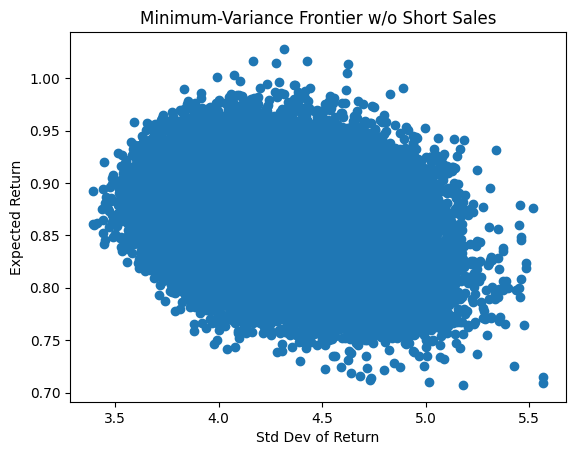

In [19]:
trials = 100000

np.random.seed(1)

points = \
    {
        'returns' : [],
        'std' : []
    }

for trial in range(trials):

    #generate 10 random weights
    rand_weights = \
        np.random.rand(10)
    
    ret, sd = data(rand_weights)

    points['returns'].append(ret)
    points['std'].append(sd)

points = \
    pd \
        .DataFrame(points)

plt \
    .scatter(
        points['std'],
        points['returns']
        )

plt \
    .xlabel('Std Dev of Return')

plt \
    .ylabel('Expected Return')

plt \
    .title('Minimum-Variance Frontier w/o Short Sales');

### Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

 8. Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

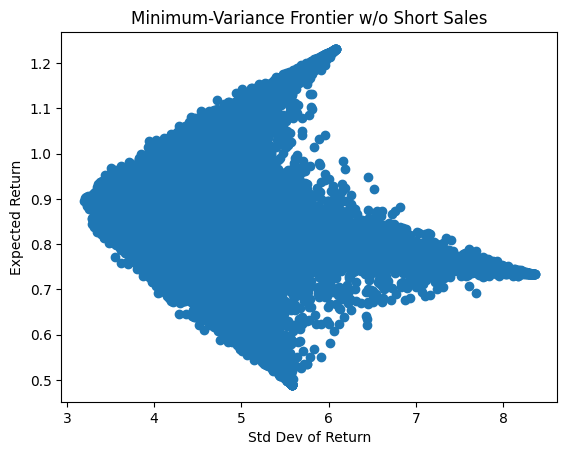

In [20]:
trials = 100000

np.random.seed(1)

points = \
    {
        'returns' : [],
        'std' : []
    }

for trial in range(trials):

    rand_weights = \
        np.random.rand(10)
    
    rand_weights = 1 / rand_weights
    
    ret, sd = data(rand_weights)

    points['returns'].append(ret)
    points['std'].append(sd)

points = \
    pd \
        .DataFrame(points)

plt \
    .scatter(
        points['std'],
        points['returns']
        )

plt \
    .xlabel('Std Dev of Return')

plt \
    .ylabel('Expected Return')

plt \
    .title('Minimum-Variance Frontier w/o Short Sales');